# Reconhecimento, Detecção de Landmarks e Classificção da Face 

## 1. Importar Bibliotecas

In [2]:
import cv2
import mediapipe as mp
import os
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 2. Inicializar MediaPipe Face Mesh

In [3]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    min_detection_confidence=0.5
)

print("Detector de faces inicializado!")

Detector de faces inicializado!


I0000 00:00:1760092822.661740   90177 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-20.7.3), renderer: Intel(R) Iris(TM) Plus Graphics 640


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1760092822.738877   91262 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760092822.762218   91263 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


## 3. Carregar e Verificar Detecção de Faces

In [4]:
# Pasta com as imagens
pasta_imagens = "imagens_face"

# Listar todas as imagens
imagens = [f for f in os.listdir(pasta_imagens) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"Encontradas {len(imagens)} imagens na pasta '{pasta_imagens}':")
for img in imagens:
    print(f"  - {img}")

Encontradas 5 imagens na pasta 'imagens_face':
  - nao_rosto.jpeg
  - rosto_quadrado.jpeg
  - rosto_triangular.jpeg
  - rosto_oval.jpeg
  - rosto_redondo.jpeg


In [5]:
# Dicionário para armazenar resultados
resultados_deteccao = {}

print("\n" + "="*60)
print("VERIFICAÇÃO DE DETECÇÃO DE FACES")
print("="*60 + "\n")

for nome_imagem in imagens:
    # Caminho completo da imagem
    caminho_imagem = os.path.join(pasta_imagens, nome_imagem)
    
    # Carregar imagem
    imagem = cv2.imread(caminho_imagem)
    
    if imagem is None:
        print(f"❌ {nome_imagem}: Erro ao carregar imagem")
        resultados_deteccao[nome_imagem] = "Não"
        continue
    
    # Converter BGR para RGB (MediaPipe usa RGB)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    
    # Tentar detectar face
    resultados = face_mesh.process(imagem_rgb)
    
    # Verificar se face foi detectada
    if resultados.multi_face_landmarks:
        print(f"✅ {nome_imagem}: Sim - Face detectada!")
        resultados_deteccao[nome_imagem] = "Sim"
    else:
        print(f"❌ {nome_imagem}: Não - Face não detectada")
        resultados_deteccao[nome_imagem] = "Não"

print("\n" + "="*60)
print("RESUMO")
print("="*60)
print(f"\nTotal de imagens: {len(imagens)}")
print(f"Faces detectadas: {sum(1 for v in resultados_deteccao.values() if v == 'Sim')}")
print(f"Faces não detectadas: {sum(1 for v in resultados_deteccao.values() if v == 'Não')}")



VERIFICAÇÃO DE DETECÇÃO DE FACES

❌ nao_rosto.jpeg: Não - Face não detectada
✅ rosto_quadrado.jpeg: Sim - Face detectada!
✅ rosto_triangular.jpeg: Sim - Face detectada!
✅ rosto_oval.jpeg: Sim - Face detectada!
✅ rosto_redondo.jpeg: Sim - Face detectada!

RESUMO

Total de imagens: 5
Faces detectadas: 4
Faces não detectadas: 1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


/var/folders/94/l19vqryd2y35j23b2gdcx0hw0000gn/T/ipykernel_4811/2367689583.py:26: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/94/l19vqryd2y35j23b2gdcx0hw0000gn/T/ipykernel_4811/2367689583.py:26: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/guilhermeduran/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guilhermeduran/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


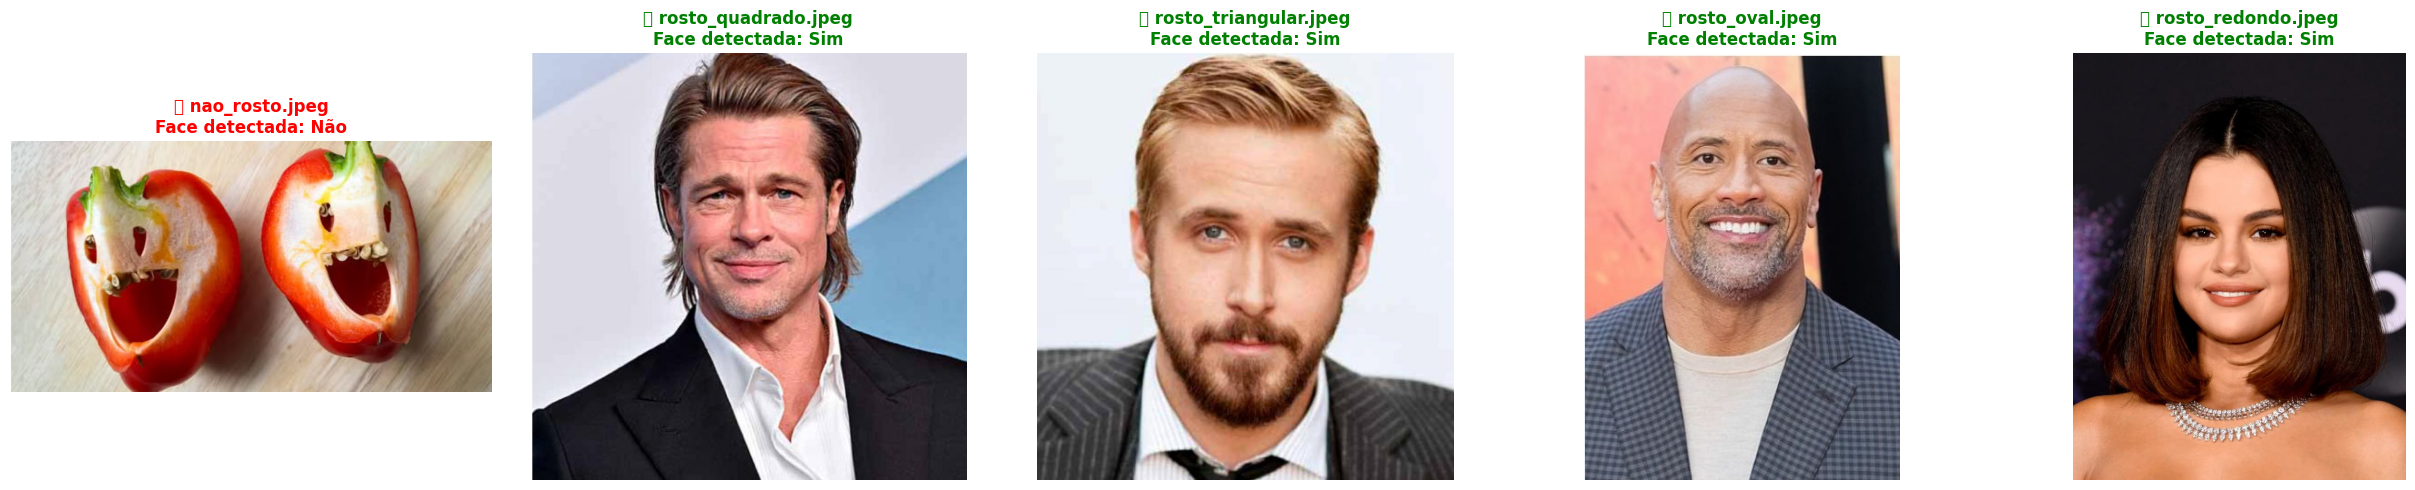

In [6]:
# Visualizar as imagens com indicação de detecção
num_imagens = len(imagens)
fig, axes = plt.subplots(1, num_imagens, figsize=(5*num_imagens, 5))

# Caso tenha apenas uma imagem, axes não será um array
if num_imagens == 1:
    axes = [axes]

for idx, nome_imagem in enumerate(imagens):
    caminho_imagem = os.path.join(pasta_imagens, nome_imagem)
    imagem = cv2.imread(caminho_imagem)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    
    # Mostrar imagem
    axes[idx].imshow(imagem_rgb)
    
    # Título com resultado
    resultado = resultados_deteccao[nome_imagem]
    cor = 'green' if resultado == "Sim" else 'red'
    simbolo = '✅' if resultado == "Sim" else '❌'
    
    axes[idx].set_title(f"{simbolo} {nome_imagem}\nFace detectada: {resultado}", 
                       fontsize=12, fontweight='bold', color=cor)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


## 4. Visualizar Landmarks nas Faces Detectadas

In [21]:
# Filtrar apenas imagens com faces detectadas
imagens_com_face = [img for img, resultado in resultados_deteccao.items() if resultado == "Sim"]

if len(imagens_com_face) == 0:
    print("⚠️ Nenhuma face foi detectada. Não é possível prosseguir com a detecção de landmarks.")
else:
    print(f"✓ {len(imagens_com_face)} imagem(ns) com face detectada.")
    print("Podemos prosseguir com a detecção de landmarks!\n")
    
    for img in imagens_com_face:
        print(f"  - {img}")


✓ 4 imagem(ns) com face detectada.
Podemos prosseguir com a detecção de landmarks!

  - rosto_quadrado.jpeg
  - rosto_triangular.jpeg
  - rosto_oval.jpeg
  - rosto_redondo.jpeg



Processando: rosto_quadrado.jpeg
✓ Total de landmarks detectados: 468
✓ Mostrando apenas 36 pontos do contorno do rosto


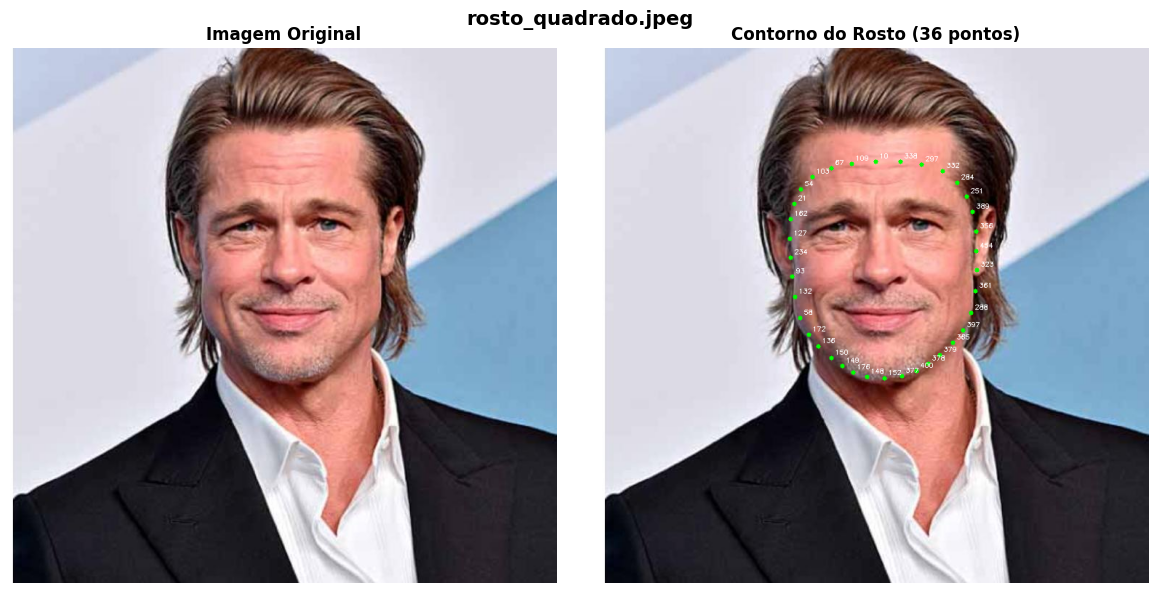

✓ Pontos do contorno desenhados com sucesso!

Processando: rosto_triangular.jpeg
✓ Total de landmarks detectados: 468
✓ Mostrando apenas 36 pontos do contorno do rosto


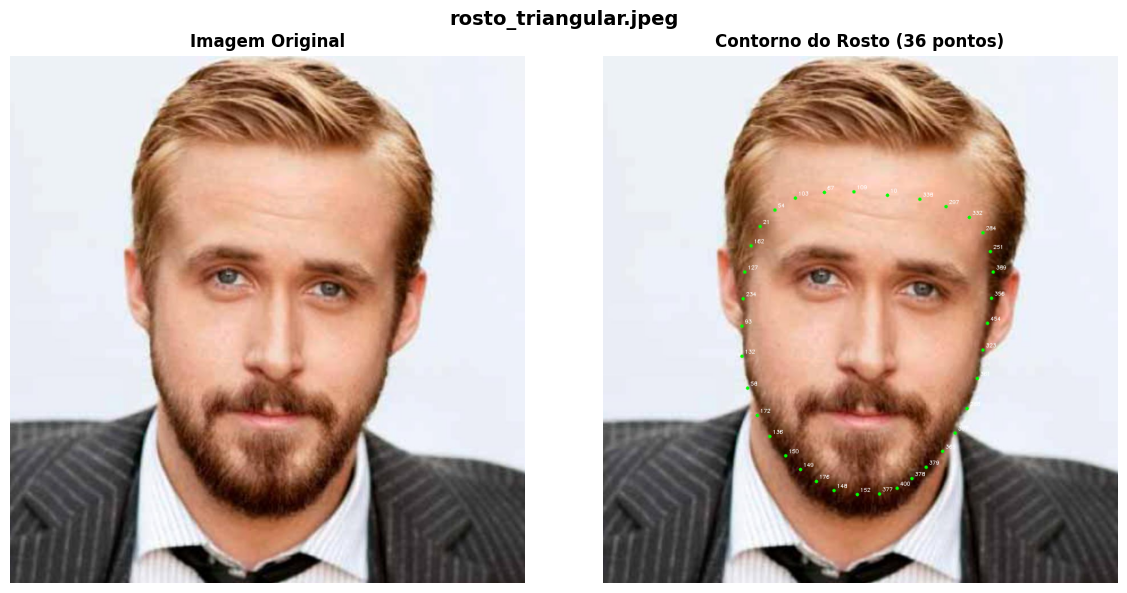

✓ Pontos do contorno desenhados com sucesso!

Processando: rosto_oval.jpeg
✓ Total de landmarks detectados: 468
✓ Mostrando apenas 36 pontos do contorno do rosto


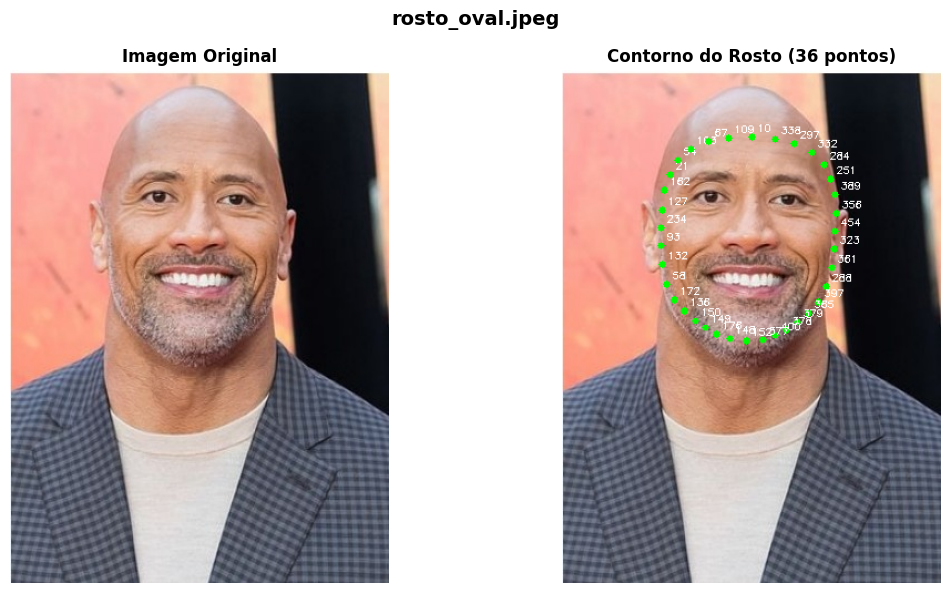

✓ Pontos do contorno desenhados com sucesso!

Processando: rosto_redondo.jpeg
✓ Total de landmarks detectados: 468
✓ Mostrando apenas 36 pontos do contorno do rosto


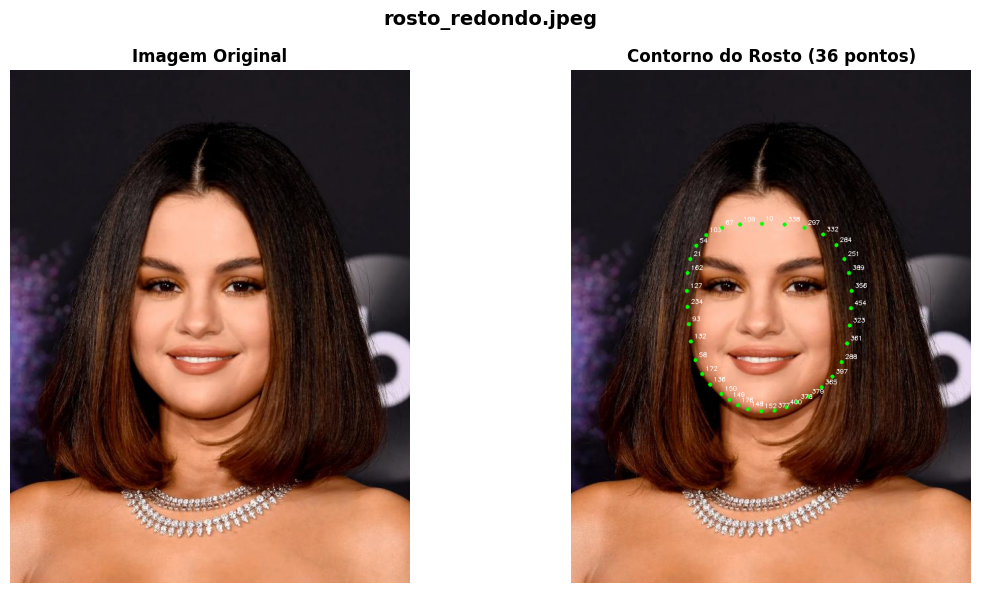

✓ Pontos do contorno desenhados com sucesso!


In [22]:
if len(imagens_com_face) > 0:
    # Pontos do contorno do rosto
    pontos_contorno = [10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 
                       397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136, 
                       172, 58, 132, 93, 234, 127, 162, 21, 54, 103, 67, 109]
    
    # Processar cada imagem com face detectada
    for nome_imagem in imagens_com_face:
        print(f"\n{'='*60}")
        print(f"Processando: {nome_imagem}")
        print('='*60)
        
        caminho_imagem = os.path.join(pasta_imagens, nome_imagem)
        imagem = cv2.imread(caminho_imagem)
        imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
        h, w = imagem.shape[:2]
        
        # Detectar landmarks
        resultados = face_mesh.process(imagem_rgb)
        
        # Criar cópia para desenhar
        imagem_com_landmarks = imagem.copy()
        
        if resultados.multi_face_landmarks:
            face_landmarks = resultados.multi_face_landmarks[0]
            
            # Informações sobre landmarks
            print(f"✓ Total de landmarks detectados: {len(face_landmarks.landmark)}")
            print(f"✓ Mostrando apenas {len(pontos_contorno)} pontos do contorno do rosto")
            
            # Desenhar apenas os pontos do contorno com numeração
            for idx in pontos_contorno:
                landmark = face_landmarks.landmark[idx]
                
                # Coordenadas do landmark
                x = int(landmark.x * w)
                y = int(landmark.y * h)
                
                # Desenhar ponto (círculo)
                cv2.circle(imagem_com_landmarks, (x, y), 3, (0, 255, 0), -1)
                
                # Adicionar numeração em todos os pontos do contorno
                cv2.putText(imagem_com_landmarks, str(idx), 
                           (x + 5, y - 5),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1)
            
            # Visualizar lado a lado
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
            
            # Imagem original
            axes[0].imshow(imagem_rgb)
            axes[0].set_title('Imagem Original', fontsize=12, fontweight='bold')
            axes[0].axis('off')
            
            # Imagem com landmarks do contorno numerados
            axes[1].imshow(cv2.cvtColor(imagem_com_landmarks, cv2.COLOR_BGR2RGB))
            axes[1].set_title(f'Contorno do Rosto ({len(pontos_contorno)} pontos)', 
                             fontsize=12, fontweight='bold')
            axes[1].axis('off')
            
            plt.suptitle(nome_imagem, fontsize=14, fontweight='bold', y=0.98)
            plt.tight_layout()
            plt.show()
            
            print(f"✓ Pontos do contorno desenhados com sucesso!")
        else:
            print(f"⚠️ Erro ao processar landmarks para {nome_imagem}")


## 5. Visualizar Pontos Usados nos Cálculos


/var/folders/94/l19vqryd2y35j23b2gdcx0hw0000gn/T/ipykernel_4811/3069312716.py:70: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/94/l19vqryd2y35j23b2gdcx0hw0000gn/T/ipykernel_4811/3069312716.py:70: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/94/l19vqryd2y35j23b2gdcx0hw0000gn/T/ipykernel_4811/3069312716.py:70: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/94/l19vqryd2y35j23b2gdcx0hw0000gn/T/ipykernel_4811/3069312716.py:70: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


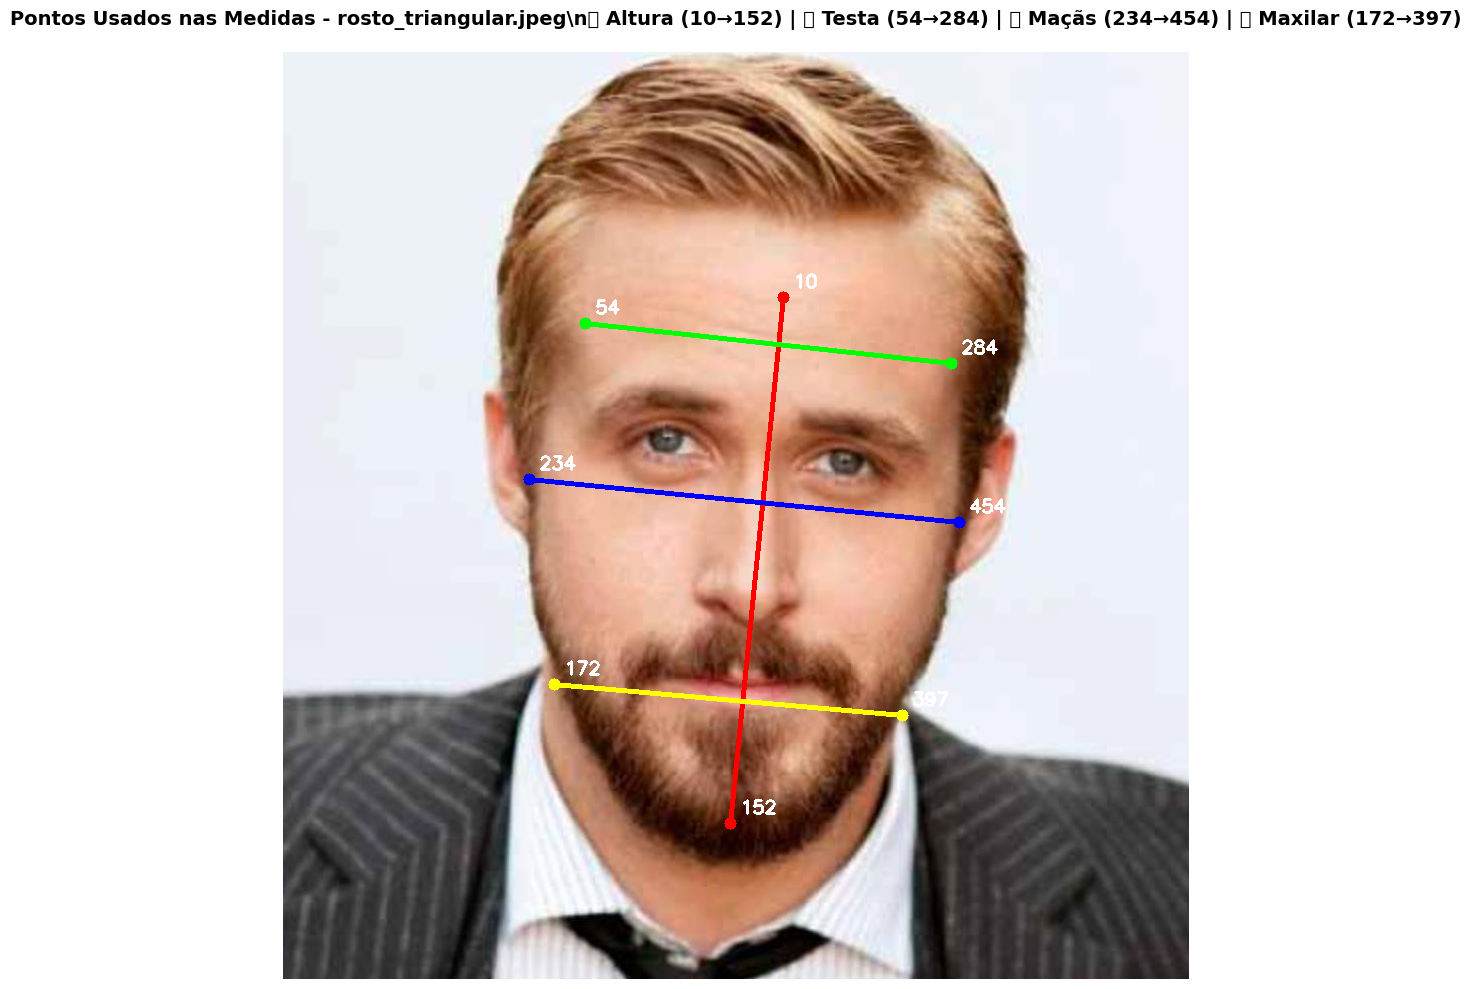

\n======================================================================
PONTOS UTILIZADOS NAS MEDIDAS:
🔴 ALTURA:   ponto 10 (topo testa) → ponto 152 (queixo)
🟢 TESTA:    ponto 54 (lateral esq) → ponto 284 (lateral dir)
🔵 MAÇÃS:    ponto 234 (maçã dir) → ponto 454 (maçã esq)
🟡 MAXILAR:  ponto 172 (maxilar dir) → ponto 397 (maxilar esq)


In [53]:
# Visualizar os pontos que serão usados nas medidas
if len(imagens_com_face) > 0:
    imagem_exemplo = imagens_com_face[1]
    
    caminho = os.path.join(pasta_imagens, imagem_exemplo)
    imagem = cv2.imread(caminho)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    h, w = imagem.shape[:2]
    
    # Detectar landmarks
    res = face_mesh.process(imagem_rgb)
    
    if res.multi_face_landmarks:
        landmarks = res.multi_face_landmarks[0]
        
        # Pontos que serão usados nas medidas
        pontos_medidas = {
            10: 'Topo testa',
            152: 'Queixo',
            54: 'Testa esq',
            284: 'Testa dir',
            234: 'Maçã dir',
            454: 'Maçã esq',
            172: 'Maxilar dir',
            397: 'Maxilar esq'
        }
        
        # Obter coordenadas
        coords = {}
        for idx, nome in pontos_medidas.items():
            lm = landmarks.landmark[idx]
            coords[idx] = (int(lm.x * w), int(lm.y * h))
        
        # Desenhar os pontos e linhas de medição
        imagem_medidas = imagem.copy()
        
        # Altura (10-152) - Vermelho
        cv2.line(imagem_medidas, coords[10], coords[152], (0, 0, 255), 3)
        cv2.circle(imagem_medidas, coords[10], 6, (0, 0, 255), -1)
        cv2.circle(imagem_medidas, coords[152], 6, (0, 0, 255), -1)
        
        # Testa (54-284) - Verde
        cv2.line(imagem_medidas, coords[54], coords[284], (0, 255, 0), 3)
        cv2.circle(imagem_medidas, coords[54], 6, (0, 255, 0), -1)
        cv2.circle(imagem_medidas, coords[284], 6, (0, 255, 0), -1)
        
        # Maçãs (234-454) - Azul
        cv2.line(imagem_medidas, coords[234], coords[454], (255, 0, 0), 3)
        cv2.circle(imagem_medidas, coords[234], 6, (255, 0, 0), -1)
        cv2.circle(imagem_medidas, coords[454], 6, (255, 0, 0), -1)
        
        # Maxilar (172-397) - Amarelo
        cv2.line(imagem_medidas, coords[172], coords[397], (0, 255, 255), 3)
        cv2.circle(imagem_medidas, coords[172], 6, (0, 255, 255), -1)
        cv2.circle(imagem_medidas, coords[397], 6, (0, 255, 255), -1)
        
        # Adicionar números e labels
        for idx, nome in pontos_medidas.items():
            x, y = coords[idx]
            cv2.putText(imagem_medidas, str(idx), (x+10, y-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        
        # Visualizar
        plt.figure(figsize=(14, 10))
        plt.imshow(cv2.cvtColor(imagem_medidas, cv2.COLOR_BGR2RGB))
        plt.title(f'Pontos Usados nas Medidas - {imagem_exemplo}\\n' +
                 '🔴 Altura (10→152) | 🟢 Testa (54→284) | 🔵 Maçãs (234→454) | 🟡 Maxilar (172→397)',
                 fontsize=14, fontweight='bold', pad=20)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        print("\\n" + "="*70)
        print("PONTOS UTILIZADOS NAS MEDIDAS:")
        print("="*70)
        print("🔴 ALTURA:   ponto 10 (topo testa) → ponto 152 (queixo)")
        print("🟢 TESTA:    ponto 54 (lateral esq) → ponto 284 (lateral dir)")
        print("🔵 MAÇÃS:    ponto 234 (maçã dir) → ponto 454 (maçã esq)")
        print("🟡 MAXILAR:  ponto 172 (maxilar dir) → ponto 397 (maxilar esq)")
        print("="*70)


## 6. Calcular Medidas


In [ ]:
def distancia(p1, p2):
    """Calcula a distância euclidiana entre dois pontos"""
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Processar cada imagem e calcular as medidas
resultados = {}

for nome_imagem in imagens_com_face:
    caminho = os.path.join(pasta_imagens, nome_imagem)
    imagem = cv2.imread(caminho)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    h, w = imagem.shape[:2]
    
    # Detectar landmarks
    res = face_mesh.process(imagem_rgb)
    
    if res.multi_face_landmarks:
        landmarks = res.multi_face_landmarks[0]
        
        # Obter coordenadas dos pontos necessários
        coords = {}
        # 10, 152 - altura (topo testa → queixo)
        # 54, 284 - testa (laterais da testa)
        # 234, 454 - maçãs/zigomático (parte mais larga do rosto)
        # 172, 397 - maxilar (mandíbula)
        pontos_necessarios = [10, 152, 54, 284, 234, 454, 172, 397]
        
        for idx in pontos_necessarios:
            lm = landmarks.landmark[idx]
            coords[idx] = (lm.x * w, lm.y * h)
        
        # Calcular distâncias
        altura = distancia(coords[10], coords[152])
        testa = distancia(coords[54], coords[284])
        macas = distancia(coords[234], coords[454])
        maxilar = distancia(coords[172], coords[397])
        
        # Calcular índices (todas as relações possíveis)
        h_w = altura / macas if macas > 0 else 0           # Altura/Maçãs (largura)
        j_t = maxilar / testa if testa > 0 else 0          # Maxilar/Testa
        j_c = maxilar / macas if macas > 0 else 0          # Maxilar/Maçãs
        t_c = testa / macas if macas > 0 else 0            # Testa/Maçãs
        t_j = testa / maxilar if maxilar > 0 else 0        # Testa/Maxilar
        
        resultados[nome_imagem] = {
            'altura': altura,
            'testa': testa,
            'macas': macas,
            'maxilar': maxilar,
            'h_w': h_w,      # Altura/Largura
            'j_t': j_t,      # Maxilar/Testa
            'j_c': j_c,      # Maxilar/Maçãs
            't_c': t_c,      # Testa/Maçãs
            't_j': t_j       # Testa/Maxilar
        }

print("✓ Medidas calculadas para todas as imagens!\n")
print("="*70)
for img, vals in resultados.items():
    print(f"{img}:")
    print(f"  Altura:        {vals['altura']:.2f} px")
    print(f"  Testa:         {vals['testa']:.2f} px")
    print(f"  Maçãs:         {vals['macas']:.2f} px")
    print(f"  Maxilar:       {vals['maxilar']:.2f} px")
    print(f"\n  ÍNDICES:")
    print(f"  H/W (altura/maçãs):      {vals['h_w']:.4f}")
    print(f"  J/T (maxilar/testa):     {vals['j_t']:.4f}")
    print(f"  J/C (maxilar/maçãs):     {vals['j_c']:.4f}")
    print(f"  T/C (testa/maçãs):       {vals['t_c']:.4f}")
    print(f"  T/J (testa/maxilar):     {vals['t_j']:.4f}")
    print("-"*70)


✓ Medidas calculadas para todas as imagens!

rosto_quadrado.jpeg:
  Altura:        298.01 px
  Testa:         214.35 px
  Maçãs:         255.06 px
  Maxilar:       212.11 px

  ÍNDICES:
  H/W (altura/maçãs):      1.1684
  J/T (maxilar/testa):     0.9896
  J/C (maxilar/maçãs):     0.8316
  T/C (testa/maçãs):       0.8404
  T/J (testa/maxilar):     1.0106
----------------------------------------------------------------------
rosto_triangular.jpeg:
  Altura:        529.20 px
  Testa:         369.14 px
  Maçãs:         431.79 px
  Maxilar:       349.67 px

  ÍNDICES:
  H/W (altura/maçãs):      1.2256
  J/T (maxilar/testa):     0.9473
  J/C (maxilar/maçãs):     0.8098
  T/C (testa/maçãs):       0.8549
  T/J (testa/maxilar):     1.0557
----------------------------------------------------------------------
rosto_oval.jpeg:
  Altura:        183.64 px
  Testa:         131.51 px
  Maçãs:         156.88 px
  Maxilar:       129.23 px

  ÍNDICES:
  H/W (altura/maçãs):      1.1706
  J/T (maxilar/tes

## 7. Classificar Formato do Rosto


In [ ]:
def classificar_formato_rosto(vals):
    """
    Classificação baseada em comparações diretas entre medidas:
    - Testa vs Maxilar → Quadrado
    - Maçãs como ponto mais largo → Oval
    - Testa larga, maxilar estreito → Triangular
    - Altura vs Largura → Redondo
    """
    # Medidas absolutas
    testa = vals['testa']
    macas = vals['macas']
    maxilar = vals['maxilar']
    
    # Índices
    h_w = vals['h_w']      # Altura/Maçãs
    j_t = vals['j_t']      # Maxilar/Testa
    j_c = vals['j_c']      # Maxilar/Maçãs
    t_c = vals['t_c']      # Testa/Maçãs
    
    # QUADRADO: Testa ≈ Maxilar
    # j_t próximo de 1 significa que testa e maxilar são similares
    if 0.95 <= j_t <= 1.05:
        return "Quadrado"
    
    # OVAL: Maçãs > Testa E Maçãs > Maxilar
    # Maçãs são a parte mais larga do rosto
    # t_c < 1 significa testa < maçãs
    # j_c < 1 significa maxilar < maçãs
    if t_c < 0.98 and j_c < 0.98:
        return "Oval"
    
    # TRIANGULAR: Testa > Maçãs E Maxilar < Maçãs
    # Base superior larga, afunila para baixo
    # t_c > 1 significa testa > maçãs
    # j_c < 1 significa maxilar < maçãs
    if t_c > 1.02 and j_c < 0.95:
        return "Triangular"
    
    # REDONDO: Altura próxima da largura (H/W próximo de 1)
    # Formato circular, não alongado
    if h_w < 1.17:
        return "Redondo"
    
    # TRIANGULAR INVERTIDO: Maxilar > Testa
    # j_t > 1 significa maxilar > testa
    if j_t > 1.05:
        return "Triangular invertido"
    
    # Fallback
    return "Indefinido"

# Classificar todas as imagens
classificacoes = {}

for img, vals in resultados.items():
    formato = classificar_formato_rosto(vals)
    classificacoes[img] = formato

# Exibir resultados
print("\n" + "="*70)
print("RESULTADOS DA CLASSIFICAÇÃO")
print("="*70 + "\n")

for img in imagens_com_face:
    vals = resultados[img]
    formato = classificacoes[img]
    
    print(f"📸 {img}")
    print(f"   H/W={vals['h_w']:.3f} | J/T={vals['j_t']:.3f} | J/C={vals['j_c']:.3f} | T/C={vals['t_c']:.3f}")
    print(f"   → Formato: {formato.upper()}")
    print("-"*70)

# Mostrar as regras aplicadas
print("\n" + "="*70)
print("REGRAS DE CLASSIFICAÇÃO (BASEADAS EM COMPARAÇÕES):")
print("="*70)
print("• Quadrado:   Testa ≈ Maxilar (0.95 ≤ J/T ≤ 1.05)")
print("• Oval:       Maçãs > Testa E Maçãs > Maxilar (T/C<0.98 e J/C<0.98)")
print("• Triangular: Testa > Maçãs E Maxilar < Maçãs (T/C>1.02 e J/C<0.95)")
print("• Redondo:    Altura ≈ Largura (H/W < 1.17)")
print("• Tri. Inv:   Maxilar > Testa (J/T > 1.05)")
print("="*70)
print("\nLegenda dos índices:")
print("  H/W = Altura / Maçãs")
print("  J/T = Maxilar / Testa")
print("  J/C = Maxilar / Maçãs")
print("  T/C = Testa / Maçãs")
print("="*70)


RESULTADOS DA CLASSIFICAÇÃO

📸 rosto_quadrado.jpeg
   H/W=1.168 | J/T=0.990 | J/C=0.832 | T/C=0.840
   → Formato: QUADRADO
----------------------------------------------------------------------
📸 rosto_triangular.jpeg
   H/W=1.226 | J/T=0.947 | J/C=0.810 | T/C=0.855
   → Formato: OVAL
----------------------------------------------------------------------
📸 rosto_oval.jpeg
   H/W=1.171 | J/T=0.983 | J/C=0.824 | T/C=0.838
   → Formato: QUADRADO
----------------------------------------------------------------------
📸 rosto_redondo.jpeg
   H/W=1.148 | J/T=0.931 | J/C=0.799 | T/C=0.858
   → Formato: OVAL
----------------------------------------------------------------------

REGRAS DE CLASSIFICAÇÃO (BASEADAS EM COMPARAÇÕES):
• Quadrado:   Testa ≈ Maxilar (0.95 ≤ J/T ≤ 1.05)
• Oval:       Maçãs > Testa E Maçãs > Maxilar (T/C<0.98 e J/C<0.98)
• Triangular: Testa > Maçãs E Maxilar < Maçãs (T/C>1.02 e J/C<0.95)
• Redondo:    Altura ≈ Largura (H/W < 1.17)
• Tri. Inv:   Maxilar > Testa (J/T > 1.

## 8. Visualização Final - Todas as Classificações



IMAGEM: rosto_quadrado.jpeg


/var/folders/94/l19vqryd2y35j23b2gdcx0hw0000gn/T/ipykernel_4811/2755349624.py:112: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/94/l19vqryd2y35j23b2gdcx0hw0000gn/T/ipykernel_4811/2755349624.py:112: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/94/l19vqryd2y35j23b2gdcx0hw0000gn/T/ipykernel_4811/2755349624.py:112: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/94/l19vqryd2y35j23b2gdcx0hw0000gn/T/ipykernel_4811/2755349624.py:112: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


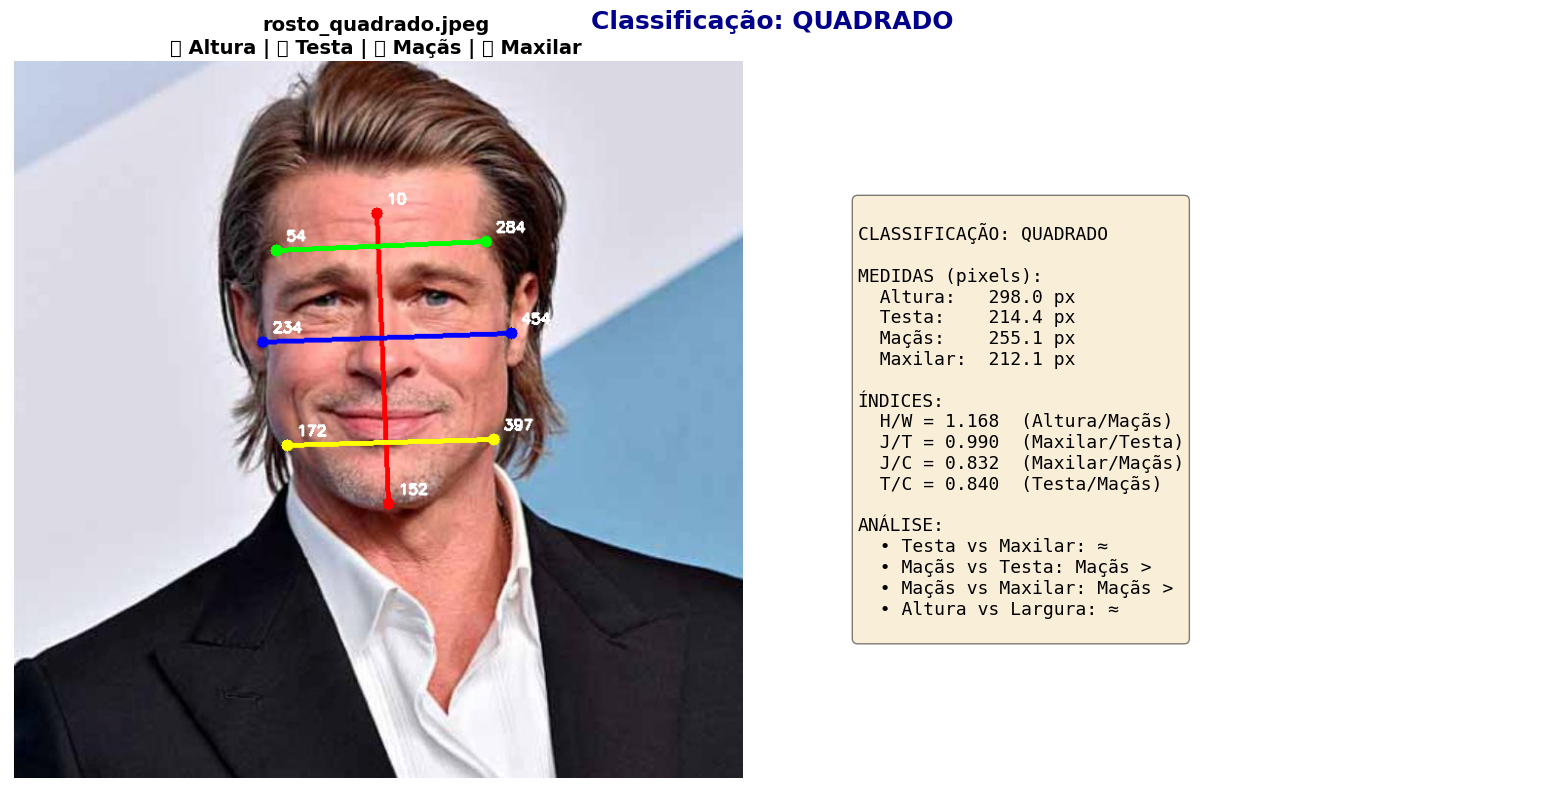

✓ Formato: QUADRADO
  H/W=1.168 | J/T=0.990 | J/C=0.832 | T/C=0.840

IMAGEM: rosto_triangular.jpeg


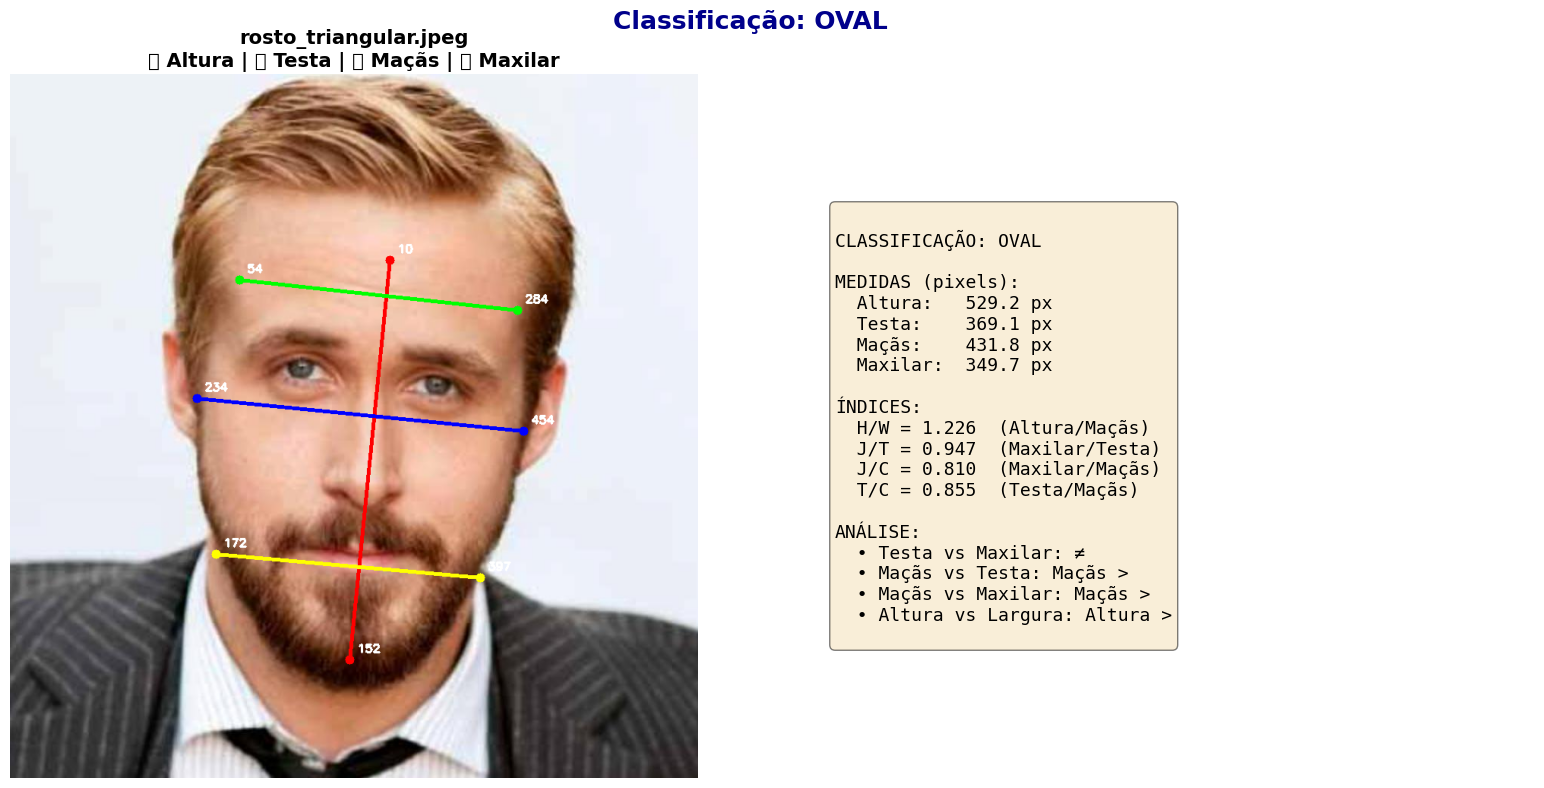

✓ Formato: OVAL
  H/W=1.226 | J/T=0.947 | J/C=0.810 | T/C=0.855

IMAGEM: rosto_oval.jpeg


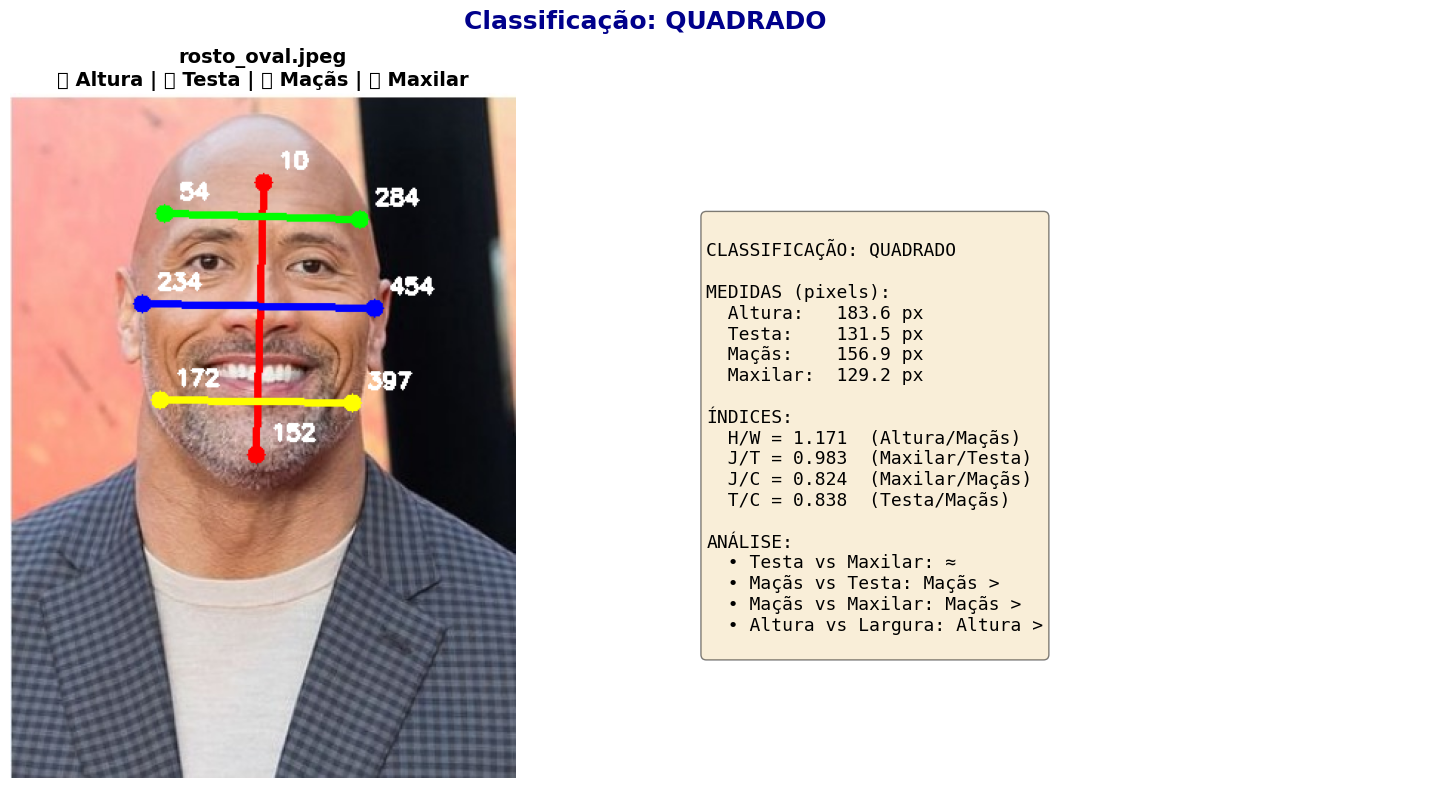

✓ Formato: QUADRADO
  H/W=1.171 | J/T=0.983 | J/C=0.824 | T/C=0.838

IMAGEM: rosto_redondo.jpeg


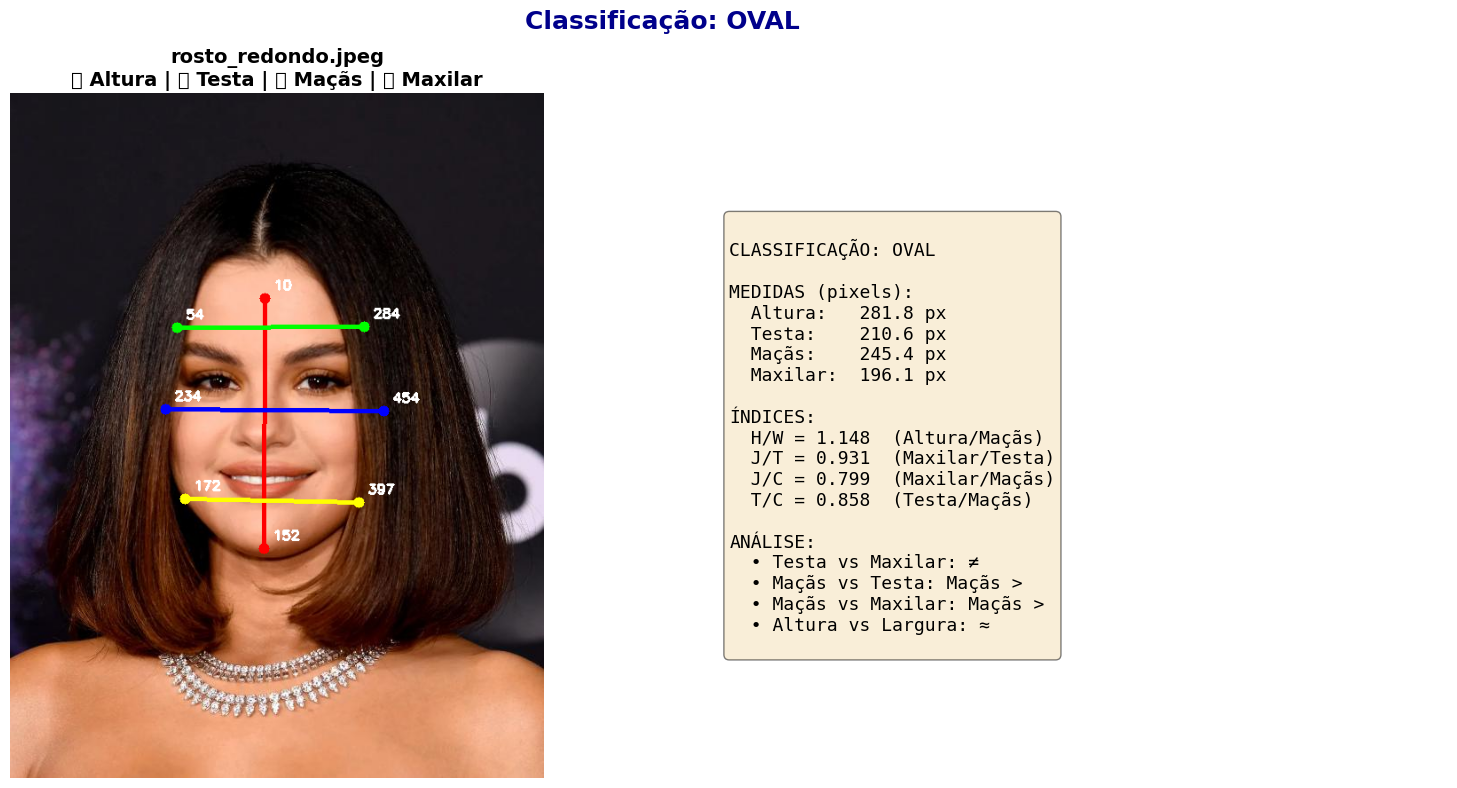

✓ Formato: OVAL
  H/W=1.148 | J/T=0.931 | J/C=0.799 | T/C=0.858

✓ Visualização completa de todas as imagens!


In [55]:
# Visualizar cada imagem com seus pontos de medição e classificação
for nome_imagem in imagens_com_face:
    print("\n" + "="*80)
    print(f"IMAGEM: {nome_imagem}")
    print("="*80)
    
    caminho = os.path.join(pasta_imagens, nome_imagem)
    imagem = cv2.imread(caminho)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    h, w = imagem.shape[:2]
    
    # Detectar landmarks
    res = face_mesh.process(imagem_rgb)
    
    if res.multi_face_landmarks:
        landmarks = res.multi_face_landmarks[0]
        
        # Obter coordenadas dos pontos
        coords = {}
        pontos_medidas = {
            10: 'Topo testa',
            152: 'Queixo',
            54: 'Testa esq',
            284: 'Testa dir',
            234: 'Maçã dir',
            454: 'Maçã esq',
            172: 'Maxilar dir',
            397: 'Maxilar esq'
        }
        
        for idx in pontos_medidas.items():
            lm = landmarks.landmark[idx[0]]
            coords[idx[0]] = (int(lm.x * w), int(lm.y * h))
        
        # Desenhar pontos e linhas
        imagem_visual = imagem.copy()
        
        # Altura (10-152) - Vermelho
        cv2.line(imagem_visual, coords[10], coords[152], (0, 0, 255), 3)
        cv2.circle(imagem_visual, coords[10], 6, (0, 0, 255), -1)
        cv2.circle(imagem_visual, coords[152], 6, (0, 0, 255), -1)
        
        # Testa (54-284) - Verde
        cv2.line(imagem_visual, coords[54], coords[284], (0, 255, 0), 3)
        cv2.circle(imagem_visual, coords[54], 6, (0, 255, 0), -1)
        cv2.circle(imagem_visual, coords[284], 6, (0, 255, 0), -1)
        
        # Maçãs (234-454) - Azul
        cv2.line(imagem_visual, coords[234], coords[454], (255, 0, 0), 3)
        cv2.circle(imagem_visual, coords[234], 6, (255, 0, 0), -1)
        cv2.circle(imagem_visual, coords[454], 6, (255, 0, 0), -1)
        
        # Maxilar (172-397) - Amarelo
        cv2.line(imagem_visual, coords[172], coords[397], (0, 255, 255), 3)
        cv2.circle(imagem_visual, coords[172], 6, (0, 255, 255), -1)
        cv2.circle(imagem_visual, coords[397], 6, (0, 255, 255), -1)
        
        # Adicionar números
        for idx in pontos_medidas.keys():
            x, y = coords[idx]
            cv2.putText(imagem_visual, str(idx), (x+10, y-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        
        # Obter dados da classificação
        vals = resultados[nome_imagem]
        formato = classificacoes[nome_imagem]
        
        # Criar figura com imagem e informações
        fig = plt.figure(figsize=(16, 8))
        
        # Imagem com pontos
        ax1 = plt.subplot(1, 2, 1)
        ax1.imshow(cv2.cvtColor(imagem_visual, cv2.COLOR_BGR2RGB))
        ax1.set_title(f'{nome_imagem}\n' +
                     '🔴 Altura | 🟢 Testa | 🔵 Maçãs | 🟡 Maxilar',
                     fontsize=14, fontweight='bold')
        ax1.axis('off')
        
        # Informações de classificação
        ax2 = plt.subplot(1, 2, 2)
        ax2.axis('off')
        
        # Texto de informações
        info_text = f"""
CLASSIFICAÇÃO: {formato.upper()}

MEDIDAS (pixels):
  Altura:   {vals['altura']:.1f} px
  Testa:    {vals['testa']:.1f} px
  Maçãs:    {vals['macas']:.1f} px
  Maxilar:  {vals['maxilar']:.1f} px

ÍNDICES:
  H/W = {vals['h_w']:.3f}  (Altura/Maçãs)
  J/T = {vals['j_t']:.3f}  (Maxilar/Testa)
  J/C = {vals['j_c']:.3f}  (Maxilar/Maçãs)
  T/C = {vals['t_c']:.3f}  (Testa/Maçãs)

ANÁLISE:
  • Testa vs Maxilar: {"≈" if 0.95 <= vals['j_t'] <= 1.05 else "≠"}
  • Maçãs vs Testa: {"Maçãs >" if vals['t_c'] < 1 else "Testa >"} 
  • Maçãs vs Maxilar: {"Maçãs >" if vals['j_c'] < 1 else "Maxilar >"}
  • Altura vs Largura: {"≈" if vals['h_w'] < 1.17 else "Altura >"}
"""
        
        ax2.text(0.1, 0.5, info_text, fontsize=13, family='monospace',
                verticalalignment='center', bbox=dict(boxstyle='round', 
                facecolor='wheat', alpha=0.5))
        
        plt.suptitle(f'Classificação: {formato.upper()}', 
                    fontsize=18, fontweight='bold', color='darkblue')
        plt.tight_layout()
        plt.show()
        
        # Print resumido
        print(f"✓ Formato: {formato.upper()}")
        print(f"  H/W={vals['h_w']:.3f} | J/T={vals['j_t']:.3f} | J/C={vals['j_c']:.3f} | T/C={vals['t_c']:.3f}")

print("\n" + "="*80)
print("✓ Visualização completa de todas as imagens!")
print("="*80)
